In [70]:
%pip install rich # 출력 관련 유틸 라이브러리
%pip install bs4
%pip install selenium

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [71]:
from urllib.parse import quote_plus
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt

from rich.console import Console
from rich.style import Style
from rich.theme import Theme

white = {
    'highlight': False,
    'style': Style(color="rgb(220,220,220)", italic=False, bold=True),
}

console = Console(theme=Theme({"repr.number": Style(color="bright_yellow", italic=True),}))
pprint = console.print

In [72]:
def get_html_soup(url):
    try:
        html = urlopen(url)
    except:
        from requests import get
        response = get(url)
        html = response._content
    soup = bs(html, "html.parser")
    return soup


def save_image(img_url, file_path):
    with open(file_path, 'wb') as f: # w: write, b: binary
        byte = urlopen(img_url).read()
        f.write(byte)


def show_image(image, axis='off', cmap=None, size=5):
    plt.figure(figsize = (size,size))
    plt.imshow(image)
    plt.axis(axis)
    plt.show()


def show_images(*images, axis='off', cmap=None, size=25):
    fig, axes = plt.subplots(1, len(images), figsize = (size, size))
    for image, ax in zip(images, axes):
      ax.imshow(image, cmap=cmap)
      ax.axis(axis)
    plt.show()

In [73]:
query = input('검색어: ')
url = 'https://stackframe.tistory.com/' # quote_plus(): 한글도 url에 쓸 수 있도록 인코딩해 주는 함수
print('가져올 페이지: ' + url)
soup = get_html_soup(url)

가져올 페이지: https://stackframe.tistory.com/


In [74]:
from rich.syntax import Syntax

def print_html(soup):
    if not isinstance(soup, bs):
        soup = bs(str(soup), "html.parser")

    syntax = Syntax(soup.prettify(), "html", theme="monokai", line_numbers=True, word_wrap=True)
    pprint(syntax)


print_html(soup)

    1 <!DOCTYPE html>                                                                                              
    2 <html lang="ko">                                                                                             
    3  <head>                                                                                                      
    4   <script type="text/javascript">                                                                            
    5    if (!window.T) { window.T = {} }                                                                          
    6 window.T.config =                                                                                            
      {"TOP_SSL_URL":"https://www.tistory.com","PREVIEW":false,"ROLE":"guest","PREV_PAGE":"","NEXT_PAGE":"","BLOG":
      {"id":2982309,"name":"stackframe","title":"stackframe","isDormancy":true,"nickName":"stackframe","status":"op
      en","profileStatus":"normal"},"NEED_COMMENT_LOGIN":false,"COMMENT_LOGIN_CONFIRM_MESSAGE":"","LOGIN_URL":"http
      s://www.tistory.com/auth/login/?redirectUrl=https://stackframe.tistory.com/","DEFAULT_URL":"https://stackfram
      e.tistory.com","USER":{"name":null,"homepage":null,"id":0,"profileImage":null},"SUBSCRIPTION":{"status":"none
      ","isConnected":false,"isPending":false,"isWait":false,"isProcessing":false,"isNone":true},"IS_LOGIN":false,"
      HAS_BLOG":false,"IS_SUPPORT":false,"IS_SCRAPABLE":false,"TOP_URL":"http://www.tistory.com","JOIN_URL":"https:
      //www.tistory.com/member/join","PHASE":"prod","ROLE_GROUP":"visitor"};                                       
    7 window.T.entryInfo = null;                                                                                   
    8 window.appInfo =                                                                                             
      {"domain":"tistory.com","topUrl":"https://www.tistory.com","loginUrl":"https://www.tistory.com/auth/login","l
      ogoutUrl":"https://www.tistory.com/auth/logout"};                                                            
    9 window.initData = {};                                                                                        
   10                                                                                                              
   11 window.TistoryBlog = {                                                                                       
   12     basePath: "",                                                                                            
   13     url: "https://stackframe.tistory.com",                                                                   
   14     tistoryUrl: "https://stackframe.tistory.com",                                                            
   15     manageUrl: "https://stackframe.tistory.com/manage",                                                      
   16     token: "S+Yfy6sKkiT4w540YXPTQcOt8bdoIKWzREpaESoRz5/zbiEf81wvrC528mrGLzjt"                                
   17 };                                                                                                           
   18 var servicePath = "";                   

In [75]:
text = soup.find_all('span', class_='title')
text2 = soup.find_all('span', class_='excerpt')

a = []
b = []

for t in text:
    a.append(t.text)

for t2 in text2:
    b.append(t2.text)

for x in range(len(a)):
    print(f'제목: {a[x]}\n내용:\t\t{b[x][:100]}\n\t\t{b[x][100:200]}...\n')

제목: systemd-detect-virt로 가상화 환경 확인하기
내용:		systemd는 systemd-detect-virt 라는 프로그램을 포함하고 있습니다. 이를통해 현재 가상화 환경에서 실행되는지, 어떤 가상화 기술을 사용하는지 확인할 수 있습니다
		. 사용방법은 단순히 쉘에서 systemd-detect-virt를 실행하면 됩니다.먼저 어떠한 가상화도 사용하지 않았다면 none이라는 문자열이 출력됩니다.라즈베리파이에서 syst...

제목: Solo V2 킥스타터에서 펀딩 중
내용:		3개월 전에 제가 Solo Tap을 구입했었는데 이제 업그레이드 버전인 Solo V2가 킥스타터에서 펀딩을 하고 있습니다. https://www.kickstarter.com/pro
		jects/conorpatrick/solo-v2-safety-net-against-phishing/ 이전부터 새로운 버전이 나오는걸 기다리고 있었고 열리자마자 바로 후원을 신청했습...

제목: 고급 보호 프로그램으로 구글 계정을 더 안전하게 보호하기
내용:		이전 글에서 설명한 2단계 인증으로는 일반인들에겐 충분히 안전한 보안이 될 수 있습니다. 다만 자신이 대기업의 임원이거나 정치인 등 APT 공격이나 집중 공격 타깃이 되기 쉬운 경
		우 더 강력한 보안을 원하게 될 수 있습니다. 구글은 이런 사람들을 위해서 Advanced Protection Program(고급 보호 프로그램)을 제공하고 있습니다. 이 프로그램...

제목: FIDO 인증키로 Google 2단계 인증 설정하기
내용:		구글은 타인이 무단으로 계정에 접근하지 못하도록 비밀번호 이외에 다양한 인증 방법을 제공합니다. 기본적으로 의심스러운 로그인이 발견되면 실 소유자가 사용하는 스마트폰으로 알림을 보
		내거나 알맞은 번호를 누르도록 합니다. 하지만 이것들로는 완벽하게 로그인 하는걸 막을 수 없으므로 구글은 2단계 인증을 제공합니다. 구글 계정의 2단계 인증은 https://mya...

제목: SoloKeys Solo 

In [2]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# 모듈
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = np.array([1,2,3,4,5])
data2 = np.array([6,7,8,9,10])

d3 = np.add(data, data2)
d4 = np.subtract(data, data2)
d5 = np.multiply(data, data2)
d6 = np.divide(data, data2)

print(data)
print(data2)
print('-----\n'+str(d3))
print('-----\n'+str(d4))
print('-----\n'+str(d5))
print('-----\n'+str(d6))

[1 2 3 4 5]
[ 6  7  8  9 10]
-----
[ 7  9 11 13 15]
-----
[-5 -5 -5 -5 -5]
-----
[ 6 14 24 36 50]
-----
[0.16666667 0.28571429 0.375      0.44444444 0.5       ]


In [5]:
# creating an empty array

arr = np.empty((3, 4))
print('<----------- empty ------------>')
print(arr, '\n\n') # 3, 4는 shape를 뜻함(총 행, 총 열)

# creating an full array
arr = np.full((3, 4), 5)
print('<----------- full ------------>')
print(arr, '\n\n')

<----------- empty ------------>
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]] 


<----------- full ------------>
[[5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]] 




In [ ]:
print(data.shape)
print(arr.shape)

(5,)
(3, 4)


In [17]:
# np.inf << 넘파이에서의 실수형 데이터의 최댓값
#np.zeros(4)
#np.zeros((2,3))
np.zeros(((3, 3)))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [19]:
arr = np.arange(0, 4*2*4)
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [21]:
t = arr.reshape([4,2,4])
t

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]],

       [[16, 17, 18, 19],
        [20, 21, 22, 23]],

       [[24, 25, 26, 27],
        [28, 29, 30, 31]]])

In [22]:
t.ndim

3

In [ ]:
t.sum()



np.int64(496)

In [25]:
r1 = t.sum(axis=0)
r1

array([[48, 52, 56, 60],
       [64, 68, 72, 76]])

In [27]:
r2 = t.sum(axis=1)
r2

array([[ 4,  6,  8, 10],
       [20, 22, 24, 26],
       [36, 38, 40, 42],
       [52, 54, 56, 58]])

In [28]:
r3 = t.sum(axis=2)
r3


array([[  6,  22],
       [ 38,  54],
       [ 70,  86],
       [102, 118]])

In [29]:
np.random.randn(1000)


array([ 1.10330865e-01,  6.84256368e-01,  7.90095428e-01,  1.92685020e-01,
        7.57068030e-01, -1.84839828e+00, -9.57192073e-03,  5.48548311e-01,
       -2.18887121e+00,  3.73368890e-01,  8.92549964e-01,  9.75895791e-01,
       -1.12339156e+00, -2.50193081e-01,  1.10134568e+00, -1.06475679e+00,
        1.60541884e+00, -2.06183042e+00,  1.49955100e+00, -1.22145153e+00,
        3.83539456e-01,  2.12926965e-02,  1.41151957e-01,  6.95602004e-02,
        9.91114098e-01,  1.12308920e+00, -1.50999952e+00, -1.47533934e+00,
       -2.89684293e-02, -3.83925459e-01, -1.06561634e+00, -3.91271608e-01,
       -1.05154108e+00,  9.44268191e-01,  3.73018398e-01, -1.79264991e+00,
       -7.81356357e-01, -1.64550713e-01,  4.71044516e-01, -5.85641721e-01,
       -6.69429746e-01, -9.76886893e-01, -7.38186038e-01,  1.13078933e+00,
        7.94186798e-01,  1.18807227e+00, -1.04978449e+00, -2.99400680e-01,
        2.08907053e-01,  8.27663636e-01,  1.81344098e-01,  1.42218252e+00,
        6.15405114e-01, -

In [30]:
np.random.randn(3, 4)

array([[-0.98803017, -0.57205109, -0.45215967, -0.01882375],
       [-0.90051036,  0.91787736,  1.17213557,  0.37295989],
       [ 1.42185554, -0.58508546,  1.24141692, -0.21853036]])

In [84]:
np.random.randint(1, 100, size=(1,100))

array([[89, 94, 87, 48, 91, 80, 44, 44, 26, 83, 63, 21, 86, 62, 76, 68,
        63, 85, 90, 45, 37, 95, 74, 49, 82, 84, 65, 59, 14, 30, 68, 24,
        97, 40,  4, 90, 11, 13, 37, 50,  9, 83, 51,  6, 47, 30, 58, 35,
        97, 75, 59, 50, 82, 43, 97, 56, 64, 63, 51,  5, 91,  9, 44, 46,
         4, 66, 52, 57, 72, 13, 74, 44, 74, 76, 76, 47, 70, 16,  4, 42,
        33, 73, 43, 28, 25, 92, 52, 58, 90, 51, 28, 92, 40, 69, 67, 22,
        73, 39, 65, 55]])

In [87]:
np.random.rand(20090523)

array([0.94181887, 0.48712591, 0.39755171, ..., 0.02435127, 0.42380217,
       0.80569552], shape=(20090523,))

In [88]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

a = pd.read_csv(url)
#a.head()
print(a.tail())
print('\n\n\n-->',a.shape)

     PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q  



--> (891, 12)


In [89]:


'''
열 조회:
frame['age']
frame.age

-> 값 조회?e
frame.age[0]
frame['age'][0]

행 조회:
frame.loc['kim'] < index name으로 조회
frame.iloc[0] < index로 조회

수정방법:
add_df = pd.DataFrame(df, columns=['age', 'height', 'weight', 'something'])

'''

data = {
    'age': [10, 20, 30],
    'height': [170, 180, 190],
    'weight': [77, 80, 83]
}

indexName = ['kim', 'lee', 'park']

df = pd.DataFrame(data, index=indexName)
add_df = pd.DataFrame(df, columns=['age', 'height', 'weight', 'something'])

#df['age']

#df.age

#print(df['age'][0])
#print(df.age[0])

#df.loc['kim']
#df.iloc[0]

#add_df = pd.DataFrame(df, columns=['age', 'height', 'weight', 'something'])
#add_df

#add_df['something'] = ['A', 'B', 'O']
#add_df

#add_df.drop('age', axis=1, inplace=True)
#add_df

#add_df.drop('park', axis=0, inplace=True)
#add_df

In [91]:
%pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 32.1 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.7/20.7 MB 75.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
from matplotlib import rc

iris = load_iris()

# a = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')

# a
print(iris.keys())
print(iris.DESCR)

a = pd.DataFrame(iris.data, columns=iris.feature_names)
print(a.head())

a['species'] = iris.target
print(a.head())
print(a.columns)
print(a.index)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= =====

In [93]:
print('집에 가고 싶다')

집에 가고 싶다


In [94]:
df = pd.DataFrame({
    'A': [1, 2, None],
    'B': [None, 5, 6]
})

print(df.dropna())

     A    B
1  2.0  5.0


In [95]:

filtered_df = a[a['species'] == 0]
print(filtered_df)


filtered_df2 = a[a['sepal length (cm)'] >= 5.0]
print(filtered_df2)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 4.7               3.2                1.3               0.2   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
5                 5.4               3.9                1.7               0.4   
6                 4.6               3.4                1.4               0.3   
7                 5.0               3.4                1.5               0.2   
8                 4.4               2.9                1.4               0.2   
9                 4.9               3.1                1.5               0.1   
10                5.4               3.7                1.5               0.2   
11                4.8               3.4 

In [96]:

new_df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, 30, 35, 40, 45],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
})


filtered_new_df = new_df[new_df['Age'] >= 30]
print(filtered_new_df)

      Name  Age         City
1      Bob   30  Los Angeles
2  Charlie   35      Chicago
3    David   40      Houston
4      Eve   45      Phoenix


In [ ]:
df1972 = pd.DataFrame({
    'Name': ['ASDF', 'QWER', 'EE', 'HOME', 'SCHOOL'],
    'Score': [56, 30, 35, 40, 20],
    'Format': ["adsf", "Qewr", "ert", "gof", "zdxcv", ]
})

filter = df1972[df1972['Score'] >= 40]

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
mean_score = df1972['Score'].mean()
df1972['Above_Average'] = df1972['Score'] >= mean_score

grouped = df1972.groupby('Above_Average')
for name, group in grouped:
    print(f"Group: {'Above Average' if name else 'Below Average'}")
    print(group)
    print()

Group: Below Average
     Name  Score Format  Above_Average
1    QWER     30   Qewr          False
2      EE     35    ert          False
4  SCHOOL     20  zdxcv          False

Group: Above Average
   Name  Score Format  Above_Average
0  ASDF     56   adsf           True
3  HOME     40    gof           True



In [100]:
# 'sepal length (cm)' 열을 기준으로 오름차순 정렬
sorted_a = a.sort_values(by='sepal length (cm)', ascending=True)
print(sorted_a)

# 'sepal length (cm)' 열을 기준으로 내림차순 정렬
sorted_a_desc = a.sort_values(by='sepal length (cm)', ascending=False)
print(sorted_a_desc)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
13                 4.3               3.0                1.1               0.1   
42                 4.4               3.2                1.3               0.2   
38                 4.4               3.0                1.3               0.2   
8                  4.4               2.9                1.4               0.2   
41                 4.5               2.3                1.3               0.3   
..                 ...               ...                ...               ...   
122                7.7               2.8                6.7               2.0   
118                7.7               2.6                6.9               2.3   
117                7.7               3.8                6.7               2.2   
135                7.7               3.0                6.1               2.3   
131                7.9               3.8                6.4               2.0   

     species  
13         0

In [101]:
example_csv_url = "https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv"

example_df = pd.read_csv(example_csv_url)
print(example_df)

   Month   "1958"   "1959"   "1960"
0    JAN      340      360      417
1    FEB      318      342      391
2    MAR      362      406      419
3    APR      348      396      461
4    MAY      363      420      472
5    JUN      435      472      535
6    JUL      491      548      622
7    AUG      505      559      606
8    SEP      404      463      508
9    OCT      359      407      461
10   NOV      310      362      390
11   DEC      337      405      432


In [103]:
example_df.head()


,Month,"""1958""","""1959""","""1960"""
0,JAN,340,360,417
1,FEB,318,342,391
2,MAR,362,406,419
3,APR,348,396,461
4,MAY,363,420,472


In [104]:
example_df.tail()


,Month,"""1958""","""1959""","""1960"""
7,AUG,505,559,606
8,SEP,404,463,508
9,OCT,359,407,461
10,NOV,310,362,390
11,DEC,337,405,432


In [105]:
example_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Month    12 non-null     object
 1    "1958"  12 non-null     int64 
 2    "1959"  12 non-null     int64 
 3    "1960"  12 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 516.0+ bytes


In [106]:
example_df.describe()

,"""1958""","""1959""","""1960"""
count,12.000000,12.000000,12.000000
mean,381.000000,428.333333,476.166667
std,64.530472,69.830097,77.737125
min,310.000000,342.000000,390.000000
25%,339.250000,387.500000,418.500000
50%,360.500000,406.500000,461.000000
75%,411.750000,465.250000,514.750000
max,505.000000,559.000000,622.000000


In [38]:
import numpy as np

In [39]:
# 학생 시험 데이터 분석 및 시각화

num = 100
# student = list(range(1, num+1))

a = np.arange(1, num+1)
a

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [49]:
gender = []

for _ in range(num):
    gender.append(np.random.choice(['M', 'F']))

gender

[np.str_('F'),
 np.str_('F'),
 np.str_('M'),
 np.str_('M'),
 np.str_('M'),
 np.str_('M'),
 np.str_('M'),
 np.str_('M'),
 np.str_('F'),
 np.str_('M'),
 np.str_('F'),
 np.str_('F'),
 np.str_('M'),
 np.str_('F'),
 np.str_('M'),
 np.str_('M'),
 np.str_('M'),
 np.str_('F'),
 np.str_('F'),
 np.str_('F'),
 np.str_('F'),
 np.str_('M'),
 np.str_('F'),
 np.str_('F'),
 np.str_('M'),
 np.str_('M'),
 np.str_('F'),
 np.str_('M'),
 np.str_('F'),
 np.str_('F'),
 np.str_('M'),
 np.str_('M'),
 np.str_('F'),
 np.str_('F'),
 np.str_('F'),
 np.str_('M'),
 np.str_('M'),
 np.str_('F'),
 np.str_('M'),
 np.str_('F'),
 np.str_('F'),
 np.str_('F'),
 np.str_('M'),
 np.str_('M'),
 np.str_('M'),
 np.str_('F'),
 np.str_('M'),
 np.str_('F'),
 np.str_('M'),
 np.str_('F'),
 np.str_('M'),
 np.str_('M'),
 np.str_('M'),
 np.str_('F'),
 np.str_('M'),
 np.str_('M'),
 np.str_('M'),
 np.str_('F'),
 np.str_('F'),
 np.str_('F'),
 np.str_('M'),
 np.str_('M'),
 np.str_('F'),
 np.str_('F'),
 np.str_('F'),
 np.str_('M'),
 np.str_('

In [50]:
kor = []
eng = []
math = []

for _ in range(num):
    kor.append(np.random.randint(50, 100))
    eng.append(np.random.randint(40, 100))
    math.append(np.random.randint(30, 100))


In [51]:
pd0 = pd.DataFrame({
    'Student': num,
    'Gender': gender,
    'Kor': kor,
    'Eng': eng,
    'Math': math
})

pd0

,Student,Gender,Kor,Eng,Math
0,100,F,77,76,67
1,100,F,74,65,96
2,100,M,89,68,54
3,100,M,92,40,97
4,100,M,73,41,52
...,...,...,...,...,...
95,100,F,67,82,99
96,100,M,55,65,65
97,100,M,98,78,76
98,100,F,96,64,49


In [52]:
pd0['Tot'] = pd0[['Kor', 'Eng', 'Math']].sum(axis=1)
pd0['Avg'] = pd0['Tot'] / 3
pd0.head()

,Student,Gender,Kor,Eng,Math,Tot,Avg
0,100,F,77,76,67,220,73.333333
1,100,F,74,65,96,235,78.333333
2,100,M,89,68,54,211,70.333333
3,100,M,92,40,97,229,76.333333
4,100,M,73,41,52,166,55.333333


In [53]:
print('과목별 평균: \n', pd0[['Kor', 'Eng', 'Math']].mean())

과목별 평균: 
 Kor     73.17
Eng     70.47
Math    63.74
dtype: float64


In [54]:
print('우수 학생: \n', pd0.loc[pd0['Avg'] >= 80, ['Student', 'Avg']])

우수 학생: 
     Student        Avg
18      100  83.666667
27      100  83.666667
28      100  80.000000
38      100  89.666667
39      100  80.000000
74      100  81.666667
78      100  87.000000
94      100  84.333333
95      100  82.666667
97      100  84.000000
99      100  81.000000


In [55]:
c = pd0.groupby('Gender')[['Kor', 'Eng', 'Math']].mean()
print('성별 평균 점수: \n')
print(c)

성별 평균 점수: 

              Kor        Eng       Math
Gender                                 
F       71.808511  74.446809  63.234043
M       74.377358  66.943396  64.188679


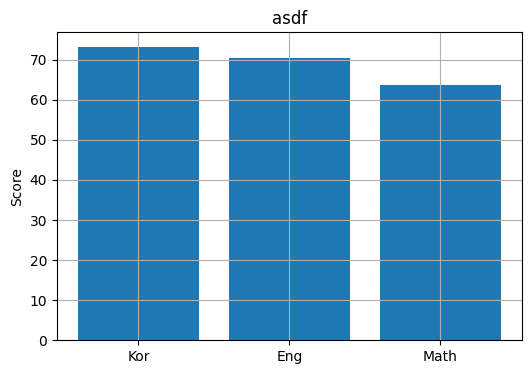

In [56]:
import matplotlib.pyplot as plt

sub = ['Kor', 'Eng', 'Math']

avg = pd0[sub].mean()

plt.figure(figsize=(6,4))
plt.bar(sub, avg)
plt.title('asdf')
plt.ylabel('Score')
plt.grid(True)
plt.show()



/var/folders/_9/5jnh5bx51l92cscrtclmkrtw0000gn/T/ipykernel_35121/2752248906.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=pd0, x='Gender', y='Avg', ci=None, palette='pastel')
/var/folders/_9/5jnh5bx51l92cscrtclmkrtw0000gn/T/ipykernel_35121/2752248906.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pd0, x='Gender', y='Avg', ci=None, palette='pastel')


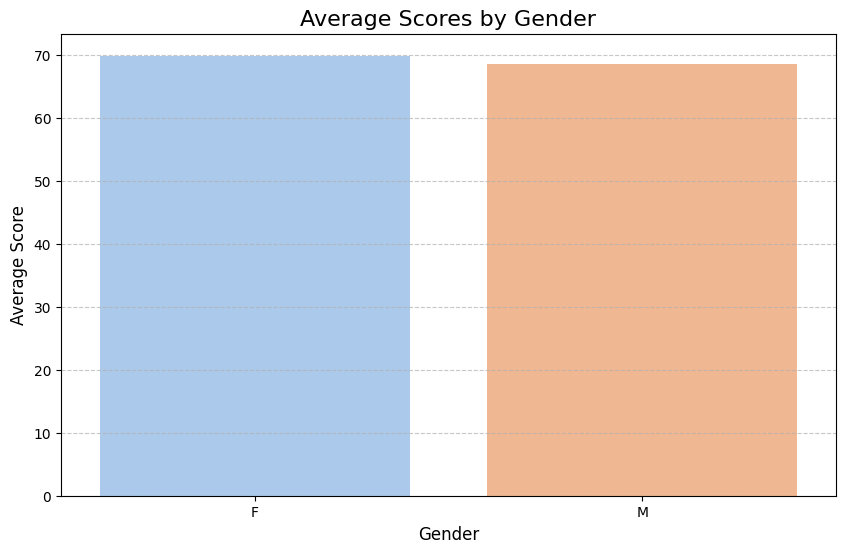

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(data=pd0, x='Gender', y='Avg', ci=None, palette='pastel')
plt.title('Average Scores by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/var/folders/_9/5jnh5bx51l92cscrtclmkrtw0000gn/T/ipykernel_35121/3681394027.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=pd0, x='Gender', y='Avg', ci=None, palette='coolwarm', edgecolor='black', linewidth=2)
/var/folders/_9/5jnh5bx51l92cscrtclmkrtw0000gn/T/ipykernel_35121/3681394027.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pd0, x='Gender', y='Avg', ci=None, palette='coolwarm', edgecolor='black', linewidth=2)


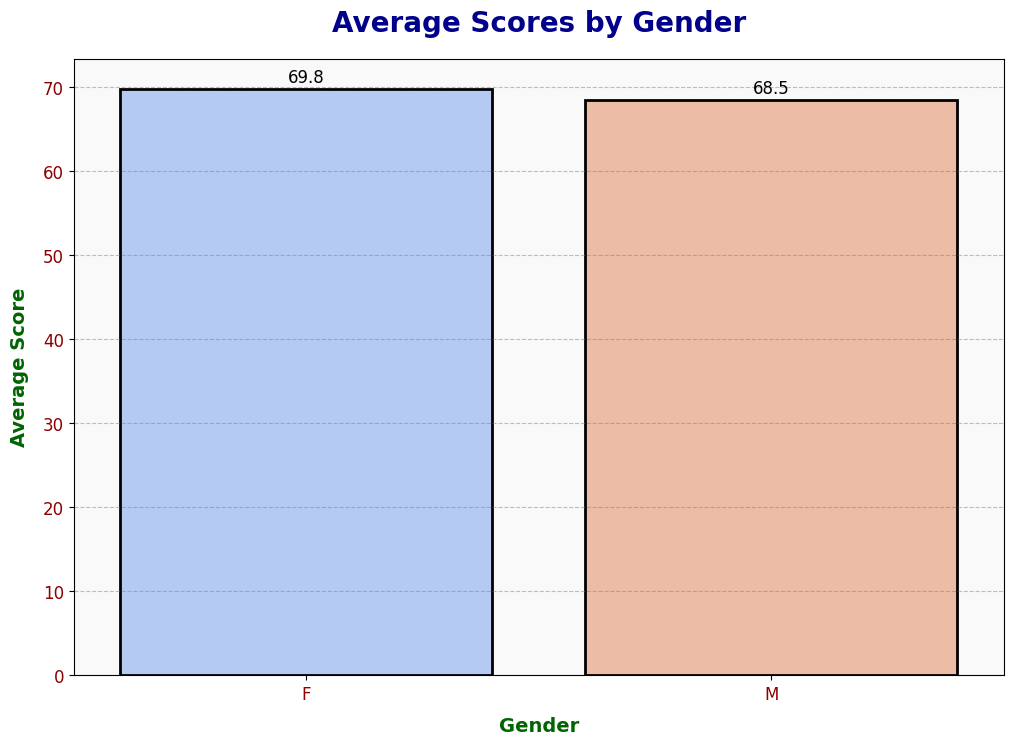

In [58]:
plt.figure(figsize=(12, 8))
sns.barplot(data=pd0, x='Gender', y='Avg', ci=None, palette='coolwarm', edgecolor='black', linewidth=2)

# 제목 및 축 레이블 스타일 추가
plt.title('Average Scores by Gender', fontsize=20, fontweight='bold', color='darkblue', pad=20)
plt.xlabel('Gender', fontsize=14, fontweight='bold', color='darkgreen', labelpad=10)
plt.ylabel('Average Score', fontsize=14, fontweight='bold', color='darkgreen', labelpad=10)

# y축 눈금 스타일 변경
plt.yticks(fontsize=12, color='darkred')
plt.xticks(fontsize=12, color='darkred')

# 배경 스타일 추가
plt.grid(axis='y', linestyle='--', alpha=0.5, color='gray')
plt.gca().set_facecolor('#f9f9f9')  # 그래프 배경색 설정

# 막대 위에 값 표시
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 8), 
                       textcoords='offset points')

plt.show()